In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random


%matplotlib inline

In [6]:
df = pd.DataFrame()

df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
x    25 non-null int64
y    25 non-null int64
dtypes: int64(2)
memory usage: 480.0 bytes
None


,x,y
0,96,1
1,17,2
2,8,73
3,22,85
4,6,87


## Simple Plots:

## Scatter Plot

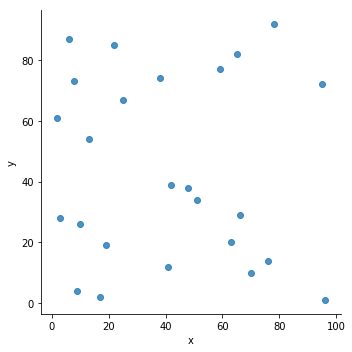

In [7]:
sns.lmplot('x', 'y', data=df, fit_reg=False)


In [14]:
np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

## Plotting Distributions

/home/jasper/working/github/pydata-visualisation/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


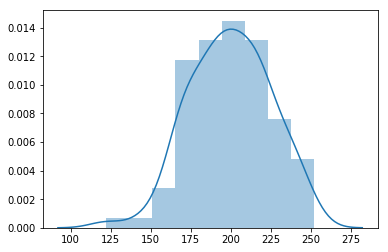

In [13]:
sns.distplot(x)

## Nicer plots in seaborn:

## Scatter plots

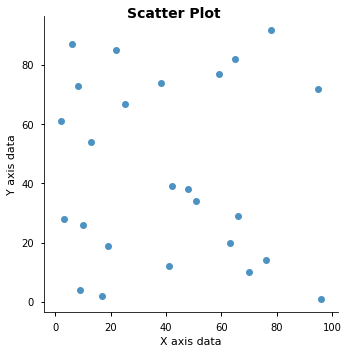

In [41]:
#with sns.plotting_context(context='poster'):
with sns.plotting_context(context='notebook'):
    pl = sns.lmplot(data=df, x='x', y='y', fit_reg=False, palette='subdued')

    pl.fig.suptitle('Scatter Plot', fontsize=14, fontweight='bold')
    pl.ax.set(xlabel='X axis data', ylabel='Y axis data');

## Plotting Distributions

/home/jasper/working/github/pydata-visualisation/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


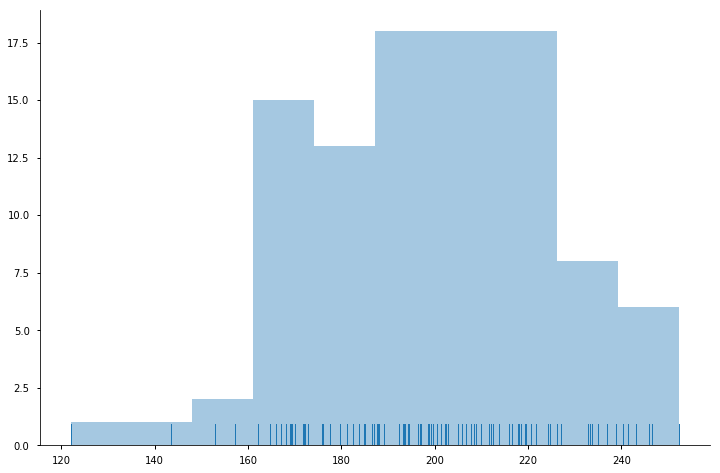

In [57]:
with sns.plotting_context(context='notebook'):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    pl_dist = sns.distplot(x, bins=10, kde=False, rug=True, ax=ax)
    
    sns.despine(fig=fig)
    
    
    

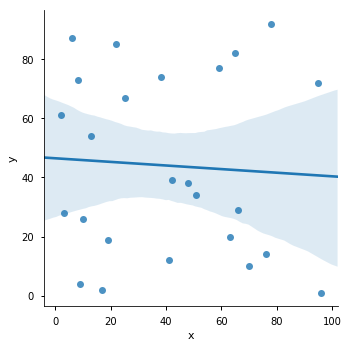

In [129]:
with sns.plotting_context(context='notebook'):
    #fig, ax = plt.subplots(figsize=(12, 8))
    
    pl_lm = sns.lmplot(data=df, x='x', y='y')
    
    #sns.despine(fig=fig)

In [131]:
print(type(pl_dist))
print(type(pl_lm))

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'seaborn.axisgrid.FacetGrid'>


## Data aware grids in Seaborn

https://seaborn.pydata.org/tutorial/axis_grids.html

In [59]:
tips = sns.load_dataset("tips")

print(tips.info())

tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


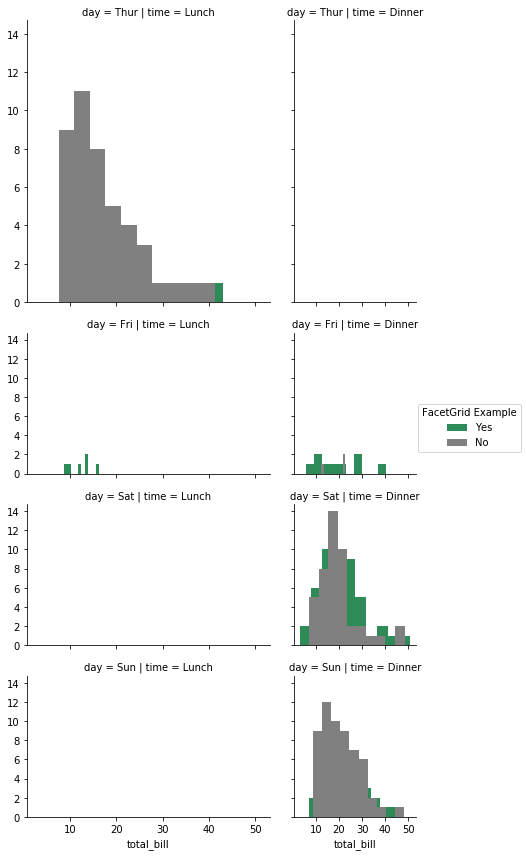

In [133]:
grid = sns.FacetGrid(tips, col="time", row='day', hue='smoker', sharey=True,
                     palette=dict(Yes="seagreen", No="gray"),
                     gridspec_kws={'width_ratios': [4, 2],
                                   'height_ratios': [4, 2, 2, 2]})

kwargs = {}
#kwargs = {'alpha': .7, 'bins': 5}

grid.map(plt.hist, "total_bill", **kwargs)
grid.add_legend(title='FacetGrid Example')

/home/jasper/working/github/pydata-visualisation/venv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


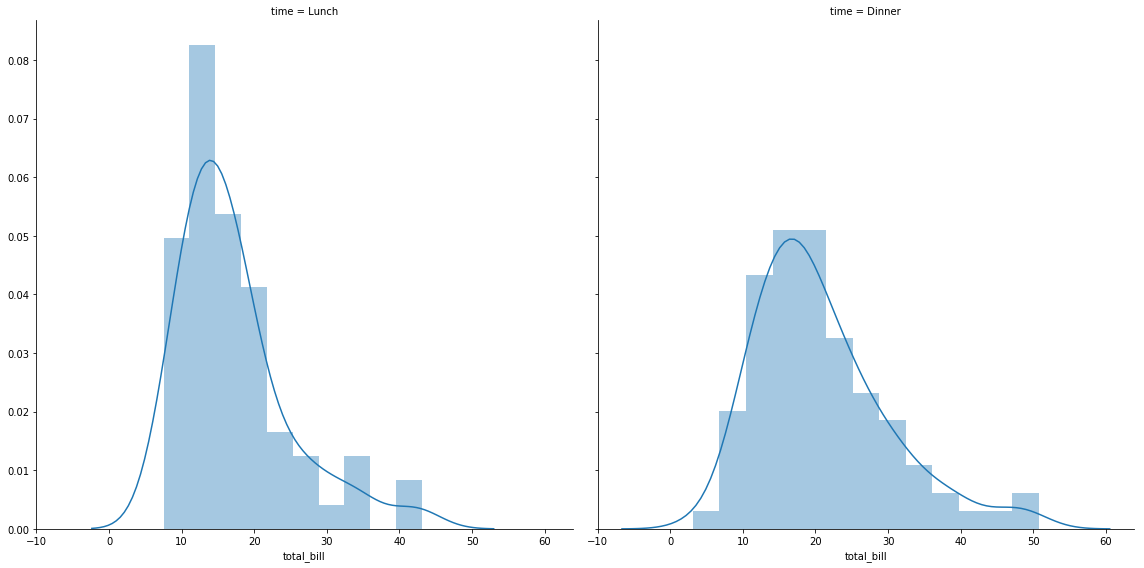

In [139]:
grid = sns.FacetGrid(tips, col='time', size=8)
grid.map(sns.distplot, "total_bill");

The :class:`FacetGrid` is an object that links a Pandas DataFrame to
a matplotlib figure with a particular structure.

In [93]:
assert isinstance(grid.fig, plt.Figure)

https://stackoverflow.com/questions/48194193/seaborn-in-jupter-notebook-why-does-sns-despine-work-for-lmplot-but-not-regpl

`ax` level functions and `fig` level functions.  
https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface


## PairGrid

https://seaborn.pydata.org/tutorial/axis_grids.html

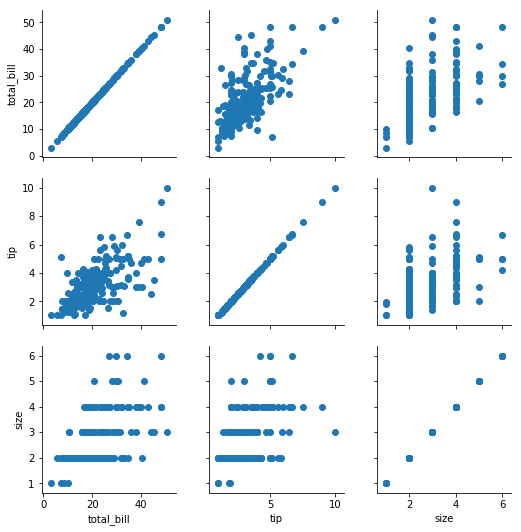

In [140]:
g = sns.PairGrid(tips)
g.map(plt.scatter);

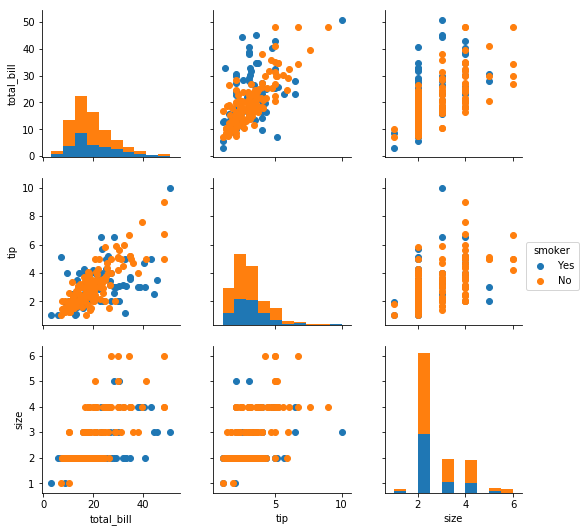

In [146]:
g = sns.PairGrid(tips, hue='smoker')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
